In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [76]:
# generate fake time series data, ensure same class data has some variance
# length: 600, 0to30: flat, rise at 30, peak at 300, then fall all the way to 600
# range: 0-500
# two classes: 0 & 1, 0 class will rise higher than 1 class
# ensure class balance
def generate_time_series(length, peak_time, max_val_range, min_val, noise_level=0.01):
    # Random maximum value within given range
    max_val = np.random.uniform(max_val_range[0], max_val_range[1])
    
    # Generate base rise and fall without noise
    if peak_time > 30:
        rise_time = np.arange(peak_time - 30)
    else:
        rise_time = np.arange(1)
    fall_time = np.arange(length - peak_time)

    # Initial flat section with noise
    flat = np.full(30, min_val) + np.random.normal(0, noise_level * max_val, 30)
    
    # Non-linear rise: use a function like sqrt or log for a more natural rise
    # Normalize to peak at max_val
    rise = np.sqrt(rise_time / rise_time.max()) * max_val
    
    # Non-linear fall: invert the rise for fall
    # Normalize to start at max_val and fall to min_val
    fall = (1 - np.sqrt(fall_time / fall_time.max())) * (max_val - min_val) + min_val
    
    # Add Gaussian noise to flat and rise and fall
    rise += np.random.normal(0, noise_level * max_val, rise_time.size)
    fall += np.random.normal(0, noise_level * max_val, fall_time.size)
    
    # Concatenate flat, rise, and fall to create the full series
    return np.concatenate([flat, rise, fall]) if peak_time > 30 else np.concatenate([flat, fall])

# class ratio is the ratio of class 1 samples to total samples
def generate_fake_data(num_samples, class_ratio=0.5):
    data = []
    labels = []
    # Parameters for the curve shape
    length = 600
    peak_time = 300
    max_val_class_0_range = [400, 450]  # Higher peak for class 0
    max_val_class_1_range = [300, 350]
    min_val = 0

    num_class_1 = int(num_samples * class_ratio)
    num_class_0 = num_samples - num_class_1
    
    for _ in range(num_class_1):
        # Class 1
        data.append(generate_time_series(length, peak_time, max_val_class_1_range, min_val))
        labels.append(1)
    
    for _ in range(num_class_0):
        # Class 0
        data.append(generate_time_series(length, peak_time, max_val_class_0_range, min_val))
        labels.append(0)

    # Optionally shuffle the data and labels together to ensure random distribution
    combined = list(zip(data, labels))
    np.random.shuffle(combined)
    data, labels = zip(*combined)
    
    return np.array(data), np.array(labels)

data, labels = generate_fake_data(2900, class_ratio=0.55)
print('data shape:', data.shape)
print('labels shape:', labels.shape)

data shape: (2900, 600)
labels shape: (2900,)


In [77]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

# store the data in a numpy format
np.save('./fake/train/X_train.npy', X_train)
np.save('./fake/test/X_test.npy', X_test)
np.save('./fake/train/y_train.npy', y_train)
np.save('./fake/test/y_test.npy', y_test)

X_train shape: (2320, 600)
X_test shape: (580, 600)
y_train shape: (2320,)
y_test shape: (580,)


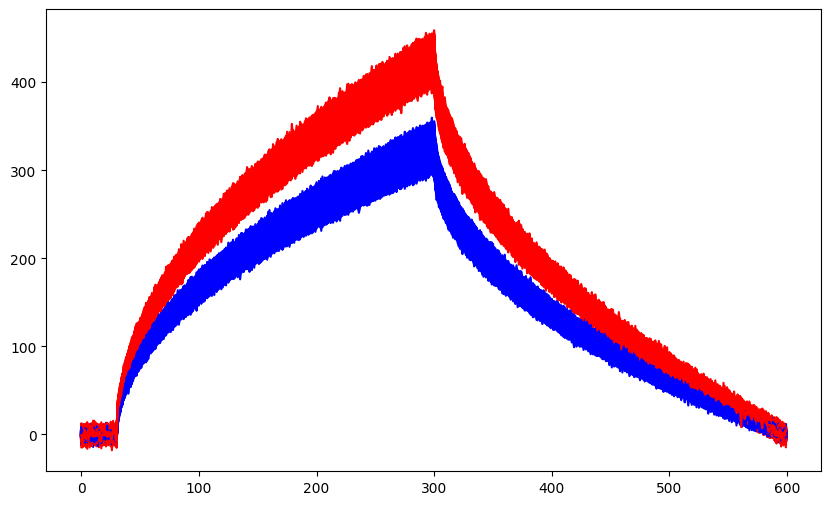

In [78]:
# plot all data
plt.figure(figsize=(10,6))
for i in range(1000):
    if labels[i] == 0:
        plt.plot(data[i], 'r')
    else:
        plt.plot(data[i], 'b')
plt.show()